In [19]:
from xdesign import *
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage.interpolation as sni

# Validating coverage approximation function

In order to calculate procedure coverage we are using an approximation which uses a Riemann sum to approximate the intersection of each pixel in the coverage map and the beam. We need to determine how the size of Riemann rectangles affects the uncertainty of the coverage map.

## Methods

This study investigates the affect of the following variables:

* Rp : the ratio of Riemann size to pixel size
* Bp : the ratio of Beam size to pixel size
* A : the expected result

We will characterize the error and uncertainty of the coverage approximation by looking at the mean error and standard deviation of the error for a square region in the center of a raster scan. For this study, the ground truth inside the region should be A, the number of projection angles, because the step size will be equal to the beam size.

In [2]:
# First detemine the largest circumscribed square
corner = (1/2)**(3/2)
region = np.array([[0.5-corner,0.5-corner], [0.5+corner,0.5+corner]])
pixel_size = 1/32

In [3]:
# Choose the range to test each parameter
Rp_range = [2**x for x in np.arange(-5, -1.5, 0.1)]
Bp_range = [2**x for x in np.arange(-2, 2.5, 0.1)]
A_range = [1, 67, 127]

means = np.full([len(A_range), len(Bp_range), len(Rp_range)], np.nan)
std = np.full([len(A_range), len(Bp_range), len(Rp_range)], np.nan)

In [4]:
# Print the ranges if desired
# Rp_range, Bp_range, A_range

In [9]:
# Generate the data. It may already exist in /data/validation
for A in range(len(A_range)):
    for Bp in range(len(Bp_range)):
        for Rp in range(len(Rp_range)):
            
            T = int(np.rint(1 / (pixel_size * Bp_range[Bp])))
            n = int(np.rint((Bp_range[Bp]) / (Rp_range[Rp])))
            
            print("{} projection angles with {:02d} "
                  "beams and {:02d} Reimann rectangles".format(A_range[A], T, n))
            
            procedure = raster_scan(A_range[A], T)
            coverage_map = coverage_approx(procedure, region, pixel_size, n=n)
    
            error = coverage_map - A_range[A]
            means[A, Bp, Rp] = np.mean(error)
            std[A, Bp, Rp] = np.std(error)
    
    np.save('./data/coverage_validation_means', means)
    np.save('./data/coverage_validation_std', std)

1 projection angles with 128 beams and 08 Reimann rectangles
1 projection angles with 128 beams and 07 Reimann rectangles
1 projection angles with 128 beams and 07 Reimann rectangles
1 projection angles with 128 beams and 06 Reimann rectangles
1 projection angles with 128 beams and 06 Reimann rectangles
1 projection angles with 128 beams and 06 Reimann rectangles
1 projection angles with 128 beams and 05 Reimann rectangles
1 projection angles with 128 beams and 05 Reimann rectangles
1 projection angles with 128 beams and 05 Reimann rectangles
1 projection angles with 128 beams and 04 Reimann rectangles
1 projection angles with 128 beams and 04 Reimann rectangles
1 projection angles with 128 beams and 04 Reimann rectangles
1 projection angles with 128 beams and 03 Reimann rectangles
1 projection angles with 128 beams and 03 Reimann rectangles
1 projection angles with 128 beams and 03 Reimann rectangles
1 projection angles with 128 beams and 03 Reimann rectangles
1 projection angles with

1 projection angles with 104 beams and 01 Reimann rectangles
1 projection angles with 97 beams and 11 Reimann rectangles
1 projection angles with 97 beams and 10 Reimann rectangles
1 projection angles with 97 beams and 09 Reimann rectangles
1 projection angles with 97 beams and 09 Reimann rectangles
1 projection angles with 97 beams and 08 Reimann rectangles
1 projection angles with 97 beams and 07 Reimann rectangles
1 projection angles with 97 beams and 07 Reimann rectangles
1 projection angles with 97 beams and 06 Reimann rectangles
1 projection angles with 97 beams and 06 Reimann rectangles
1 projection angles with 97 beams and 06 Reimann rectangles
1 projection angles with 97 beams and 05 Reimann rectangles
1 projection angles with 97 beams and 05 Reimann rectangles
1 projection angles with 97 beams and 05 Reimann rectangles
1 projection angles with 97 beams and 04 Reimann rectangles
1 projection angles with 97 beams and 04 Reimann rectangles
1 projection angles with 97 beams and 0

1 projection angles with 74 beams and 13 Reimann rectangles
1 projection angles with 74 beams and 12 Reimann rectangles
1 projection angles with 74 beams and 11 Reimann rectangles
1 projection angles with 74 beams and 11 Reimann rectangles
1 projection angles with 74 beams and 10 Reimann rectangles
1 projection angles with 74 beams and 09 Reimann rectangles
1 projection angles with 74 beams and 09 Reimann rectangles
1 projection angles with 74 beams and 08 Reimann rectangles
1 projection angles with 74 beams and 07 Reimann rectangles
1 projection angles with 74 beams and 07 Reimann rectangles
1 projection angles with 74 beams and 06 Reimann rectangles
1 projection angles with 74 beams and 06 Reimann rectangles
1 projection angles with 74 beams and 06 Reimann rectangles
1 projection angles with 74 beams and 05 Reimann rectangles
1 projection angles with 74 beams and 05 Reimann rectangles
1 projection angles with 74 beams and 05 Reimann rectangles
1 projection angles with 74 beams and 04

1 projection angles with 56 beams and 16 Reimann rectangles
1 projection angles with 56 beams and 15 Reimann rectangles
1 projection angles with 56 beams and 14 Reimann rectangles
1 projection angles with 56 beams and 13 Reimann rectangles
1 projection angles with 56 beams and 12 Reimann rectangles
1 projection angles with 56 beams and 11 Reimann rectangles
1 projection angles with 56 beams and 11 Reimann rectangles
1 projection angles with 56 beams and 10 Reimann rectangles
1 projection angles with 56 beams and 09 Reimann rectangles
1 projection angles with 56 beams and 09 Reimann rectangles
1 projection angles with 56 beams and 08 Reimann rectangles
1 projection angles with 56 beams and 07 Reimann rectangles
1 projection angles with 56 beams and 07 Reimann rectangles
1 projection angles with 56 beams and 06 Reimann rectangles
1 projection angles with 56 beams and 06 Reimann rectangles
1 projection angles with 56 beams and 06 Reimann rectangles
1 projection angles with 56 beams and 05

1 projection angles with 45 beams and 02 Reimann rectangles
1 projection angles with 42 beams and 24 Reimann rectangles
1 projection angles with 42 beams and 23 Reimann rectangles
1 projection angles with 42 beams and 21 Reimann rectangles
1 projection angles with 42 beams and 20 Reimann rectangles
1 projection angles with 42 beams and 18 Reimann rectangles
1 projection angles with 42 beams and 17 Reimann rectangles
1 projection angles with 42 beams and 16 Reimann rectangles
1 projection angles with 42 beams and 15 Reimann rectangles
1 projection angles with 42 beams and 14 Reimann rectangles
1 projection angles with 42 beams and 13 Reimann rectangles
1 projection angles with 42 beams and 12 Reimann rectangles
1 projection angles with 42 beams and 11 Reimann rectangles
1 projection angles with 42 beams and 11 Reimann rectangles
1 projection angles with 42 beams and 10 Reimann rectangles
1 projection angles with 42 beams and 09 Reimann rectangles
1 projection angles with 42 beams and 09

1 projection angles with 34 beams and 03 Reimann rectangles
1 projection angles with 34 beams and 03 Reimann rectangles
1 projection angles with 34 beams and 03 Reimann rectangles
1 projection angles with 34 beams and 03 Reimann rectangles
1 projection angles with 32 beams and 32 Reimann rectangles
1 projection angles with 32 beams and 30 Reimann rectangles
1 projection angles with 32 beams and 28 Reimann rectangles
1 projection angles with 32 beams and 26 Reimann rectangles
1 projection angles with 32 beams and 24 Reimann rectangles
1 projection angles with 32 beams and 23 Reimann rectangles
1 projection angles with 32 beams and 21 Reimann rectangles
1 projection angles with 32 beams and 20 Reimann rectangles
1 projection angles with 32 beams and 18 Reimann rectangles
1 projection angles with 32 beams and 17 Reimann rectangles
1 projection angles with 32 beams and 16 Reimann rectangles
1 projection angles with 32 beams and 15 Reimann rectangles
1 projection angles with 32 beams and 14

1 projection angles with 24 beams and 42 Reimann rectangles
1 projection angles with 24 beams and 39 Reimann rectangles
1 projection angles with 24 beams and 37 Reimann rectangles
1 projection angles with 24 beams and 34 Reimann rectangles
1 projection angles with 24 beams and 32 Reimann rectangles
1 projection angles with 24 beams and 30 Reimann rectangles
1 projection angles with 24 beams and 28 Reimann rectangles
1 projection angles with 24 beams and 26 Reimann rectangles
1 projection angles with 24 beams and 24 Reimann rectangles
1 projection angles with 24 beams and 23 Reimann rectangles
1 projection angles with 24 beams and 21 Reimann rectangles
1 projection angles with 24 beams and 20 Reimann rectangles
1 projection angles with 24 beams and 18 Reimann rectangles
1 projection angles with 24 beams and 17 Reimann rectangles
1 projection angles with 24 beams and 16 Reimann rectangles
1 projection angles with 24 beams and 15 Reimann rectangles
1 projection angles with 24 beams and 14

1 projection angles with 20 beams and 05 Reimann rectangles
1 projection angles with 20 beams and 05 Reimann rectangles
1 projection angles with 18 beams and 56 Reimann rectangles
1 projection angles with 18 beams and 52 Reimann rectangles
1 projection angles with 18 beams and 49 Reimann rectangles
1 projection angles with 18 beams and 45 Reimann rectangles
1 projection angles with 18 beams and 42 Reimann rectangles
1 projection angles with 18 beams and 39 Reimann rectangles
1 projection angles with 18 beams and 37 Reimann rectangles
1 projection angles with 18 beams and 34 Reimann rectangles
1 projection angles with 18 beams and 32 Reimann rectangles
1 projection angles with 18 beams and 30 Reimann rectangles
1 projection angles with 18 beams and 28 Reimann rectangles
1 projection angles with 18 beams and 26 Reimann rectangles
1 projection angles with 18 beams and 24 Reimann rectangles
1 projection angles with 18 beams and 23 Reimann rectangles
1 projection angles with 18 beams and 21

1 projection angles with 14 beams and 69 Reimann rectangles
1 projection angles with 14 beams and 64 Reimann rectangles
1 projection angles with 14 beams and 60 Reimann rectangles
1 projection angles with 14 beams and 56 Reimann rectangles
1 projection angles with 14 beams and 52 Reimann rectangles
1 projection angles with 14 beams and 49 Reimann rectangles
1 projection angles with 14 beams and 45 Reimann rectangles
1 projection angles with 14 beams and 42 Reimann rectangles
1 projection angles with 14 beams and 39 Reimann rectangles
1 projection angles with 14 beams and 37 Reimann rectangles
1 projection angles with 14 beams and 34 Reimann rectangles
1 projection angles with 14 beams and 32 Reimann rectangles
1 projection angles with 14 beams and 30 Reimann rectangles
1 projection angles with 14 beams and 28 Reimann rectangles
1 projection angles with 14 beams and 26 Reimann rectangles
1 projection angles with 14 beams and 24 Reimann rectangles
1 projection angles with 14 beams and 23

1 projection angles with 11 beams and 91 Reimann rectangles
1 projection angles with 11 beams and 84 Reimann rectangles
1 projection angles with 11 beams and 79 Reimann rectangles
1 projection angles with 11 beams and 74 Reimann rectangles
1 projection angles with 11 beams and 69 Reimann rectangles
1 projection angles with 11 beams and 64 Reimann rectangles
1 projection angles with 11 beams and 60 Reimann rectangles
1 projection angles with 11 beams and 56 Reimann rectangles
1 projection angles with 11 beams and 52 Reimann rectangles
1 projection angles with 11 beams and 49 Reimann rectangles
1 projection angles with 11 beams and 45 Reimann rectangles
1 projection angles with 11 beams and 42 Reimann rectangles
1 projection angles with 11 beams and 39 Reimann rectangles
1 projection angles with 11 beams and 37 Reimann rectangles
1 projection angles with 11 beams and 34 Reimann rectangles
1 projection angles with 11 beams and 32 Reimann rectangles
1 projection angles with 11 beams and 30

1 projection angles with 08 beams and 119 Reimann rectangles
1 projection angles with 08 beams and 111 Reimann rectangles
1 projection angles with 08 beams and 104 Reimann rectangles
1 projection angles with 08 beams and 97 Reimann rectangles
1 projection angles with 08 beams and 91 Reimann rectangles
1 projection angles with 08 beams and 84 Reimann rectangles
1 projection angles with 08 beams and 79 Reimann rectangles
1 projection angles with 08 beams and 74 Reimann rectangles
1 projection angles with 08 beams and 69 Reimann rectangles
1 projection angles with 08 beams and 64 Reimann rectangles
1 projection angles with 08 beams and 60 Reimann rectangles
1 projection angles with 08 beams and 56 Reimann rectangles
1 projection angles with 08 beams and 52 Reimann rectangles
1 projection angles with 08 beams and 49 Reimann rectangles
1 projection angles with 08 beams and 45 Reimann rectangles
1 projection angles with 08 beams and 42 Reimann rectangles
1 projection angles with 08 beams and

1 projection angles with 06 beams and 158 Reimann rectangles
1 projection angles with 06 beams and 147 Reimann rectangles
1 projection angles with 06 beams and 137 Reimann rectangles
1 projection angles with 06 beams and 128 Reimann rectangles
1 projection angles with 06 beams and 119 Reimann rectangles
1 projection angles with 06 beams and 111 Reimann rectangles
1 projection angles with 06 beams and 104 Reimann rectangles
1 projection angles with 06 beams and 97 Reimann rectangles
1 projection angles with 06 beams and 91 Reimann rectangles
1 projection angles with 06 beams and 84 Reimann rectangles
1 projection angles with 06 beams and 79 Reimann rectangles
1 projection angles with 06 beams and 74 Reimann rectangles
1 projection angles with 06 beams and 69 Reimann rectangles
1 projection angles with 06 beams and 64 Reimann rectangles
1 projection angles with 06 beams and 60 Reimann rectangles
1 projection angles with 06 beams and 56 Reimann rectangles
1 projection angles with 06 beams

67 projection angles with 111 beams and 01 Reimann rectangles
67 projection angles with 111 beams and 01 Reimann rectangles
67 projection angles with 111 beams and 01 Reimann rectangles
67 projection angles with 111 beams and 01 Reimann rectangles
67 projection angles with 111 beams and 01 Reimann rectangles
67 projection angles with 104 beams and 10 Reimann rectangles
67 projection angles with 104 beams and 09 Reimann rectangles
67 projection angles with 104 beams and 09 Reimann rectangles
67 projection angles with 104 beams and 08 Reimann rectangles
67 projection angles with 104 beams and 07 Reimann rectangles
67 projection angles with 104 beams and 07 Reimann rectangles
67 projection angles with 104 beams and 06 Reimann rectangles
67 projection angles with 104 beams and 06 Reimann rectangles
67 projection angles with 104 beams and 06 Reimann rectangles
67 projection angles with 104 beams and 05 Reimann rectangles
67 projection angles with 104 beams and 05 Reimann rectangles
67 proje

67 projection angles with 84 beams and 02 Reimann rectangles
67 projection angles with 84 beams and 02 Reimann rectangles
67 projection angles with 84 beams and 02 Reimann rectangles
67 projection angles with 84 beams and 02 Reimann rectangles
67 projection angles with 84 beams and 02 Reimann rectangles
67 projection angles with 84 beams and 02 Reimann rectangles
67 projection angles with 84 beams and 02 Reimann rectangles
67 projection angles with 84 beams and 01 Reimann rectangles
67 projection angles with 84 beams and 01 Reimann rectangles
67 projection angles with 84 beams and 01 Reimann rectangles
67 projection angles with 84 beams and 01 Reimann rectangles
67 projection angles with 79 beams and 13 Reimann rectangles
67 projection angles with 79 beams and 12 Reimann rectangles
67 projection angles with 79 beams and 11 Reimann rectangles
67 projection angles with 79 beams and 11 Reimann rectangles
67 projection angles with 79 beams and 10 Reimann rectangles
67 projection angles wit

67 projection angles with 64 beams and 04 Reimann rectangles
67 projection angles with 64 beams and 04 Reimann rectangles
67 projection angles with 64 beams and 04 Reimann rectangles
67 projection angles with 64 beams and 03 Reimann rectangles
67 projection angles with 64 beams and 03 Reimann rectangles
67 projection angles with 64 beams and 03 Reimann rectangles
67 projection angles with 64 beams and 03 Reimann rectangles
67 projection angles with 64 beams and 03 Reimann rectangles
67 projection angles with 64 beams and 02 Reimann rectangles
67 projection angles with 64 beams and 02 Reimann rectangles
67 projection angles with 64 beams and 02 Reimann rectangles
67 projection angles with 64 beams and 02 Reimann rectangles
67 projection angles with 64 beams and 02 Reimann rectangles
67 projection angles with 64 beams and 02 Reimann rectangles
67 projection angles with 64 beams and 02 Reimann rectangles
67 projection angles with 64 beams and 02 Reimann rectangles
67 projection angles wit

67 projection angles with 49 beams and 08 Reimann rectangles
67 projection angles with 49 beams and 07 Reimann rectangles
67 projection angles with 49 beams and 07 Reimann rectangles
67 projection angles with 49 beams and 06 Reimann rectangles
67 projection angles with 49 beams and 06 Reimann rectangles
67 projection angles with 49 beams and 06 Reimann rectangles
67 projection angles with 49 beams and 05 Reimann rectangles
67 projection angles with 49 beams and 05 Reimann rectangles
67 projection angles with 49 beams and 05 Reimann rectangles
67 projection angles with 49 beams and 04 Reimann rectangles
67 projection angles with 49 beams and 04 Reimann rectangles
67 projection angles with 49 beams and 04 Reimann rectangles
67 projection angles with 49 beams and 03 Reimann rectangles
67 projection angles with 49 beams and 03 Reimann rectangles
67 projection angles with 49 beams and 03 Reimann rectangles
67 projection angles with 49 beams and 03 Reimann rectangles
67 projection angles wit

67 projection angles with 37 beams and 15 Reimann rectangles
67 projection angles with 37 beams and 14 Reimann rectangles
67 projection angles with 37 beams and 13 Reimann rectangles
67 projection angles with 37 beams and 12 Reimann rectangles
67 projection angles with 37 beams and 11 Reimann rectangles
67 projection angles with 37 beams and 11 Reimann rectangles
67 projection angles with 37 beams and 10 Reimann rectangles
67 projection angles with 37 beams and 09 Reimann rectangles
67 projection angles with 37 beams and 09 Reimann rectangles
67 projection angles with 37 beams and 08 Reimann rectangles
67 projection angles with 37 beams and 07 Reimann rectangles
67 projection angles with 37 beams and 07 Reimann rectangles
67 projection angles with 37 beams and 06 Reimann rectangles
67 projection angles with 37 beams and 06 Reimann rectangles
67 projection angles with 37 beams and 06 Reimann rectangles
67 projection angles with 37 beams and 05 Reimann rectangles
67 projection angles wit

67 projection angles with 28 beams and 28 Reimann rectangles
67 projection angles with 28 beams and 26 Reimann rectangles
67 projection angles with 28 beams and 24 Reimann rectangles
67 projection angles with 28 beams and 23 Reimann rectangles
67 projection angles with 28 beams and 21 Reimann rectangles
67 projection angles with 28 beams and 20 Reimann rectangles
67 projection angles with 28 beams and 18 Reimann rectangles
67 projection angles with 28 beams and 17 Reimann rectangles
67 projection angles with 28 beams and 16 Reimann rectangles
67 projection angles with 28 beams and 15 Reimann rectangles
67 projection angles with 28 beams and 14 Reimann rectangles
67 projection angles with 28 beams and 13 Reimann rectangles
67 projection angles with 28 beams and 12 Reimann rectangles
67 projection angles with 28 beams and 11 Reimann rectangles
67 projection angles with 28 beams and 11 Reimann rectangles
67 projection angles with 28 beams and 10 Reimann rectangles
67 projection angles wit

67 projection angles with 23 beams and 04 Reimann rectangles
67 projection angles with 21 beams and 49 Reimann rectangles
67 projection angles with 21 beams and 45 Reimann rectangles
67 projection angles with 21 beams and 42 Reimann rectangles
67 projection angles with 21 beams and 39 Reimann rectangles
67 projection angles with 21 beams and 37 Reimann rectangles
67 projection angles with 21 beams and 34 Reimann rectangles
67 projection angles with 21 beams and 32 Reimann rectangles
67 projection angles with 21 beams and 30 Reimann rectangles
67 projection angles with 21 beams and 28 Reimann rectangles
67 projection angles with 21 beams and 26 Reimann rectangles
67 projection angles with 21 beams and 24 Reimann rectangles
67 projection angles with 21 beams and 23 Reimann rectangles
67 projection angles with 21 beams and 21 Reimann rectangles
67 projection angles with 21 beams and 20 Reimann rectangles
67 projection angles with 21 beams and 18 Reimann rectangles
67 projection angles wit

67 projection angles with 17 beams and 08 Reimann rectangles
67 projection angles with 17 beams and 07 Reimann rectangles
67 projection angles with 17 beams and 07 Reimann rectangles
67 projection angles with 17 beams and 06 Reimann rectangles
67 projection angles with 17 beams and 06 Reimann rectangles
67 projection angles with 17 beams and 06 Reimann rectangles
67 projection angles with 16 beams and 64 Reimann rectangles
67 projection angles with 16 beams and 60 Reimann rectangles
67 projection angles with 16 beams and 56 Reimann rectangles
67 projection angles with 16 beams and 52 Reimann rectangles
67 projection angles with 16 beams and 49 Reimann rectangles
67 projection angles with 16 beams and 45 Reimann rectangles
67 projection angles with 16 beams and 42 Reimann rectangles
67 projection angles with 16 beams and 39 Reimann rectangles
67 projection angles with 16 beams and 37 Reimann rectangles
67 projection angles with 16 beams and 34 Reimann rectangles
67 projection angles wit

67 projection angles with 13 beams and 15 Reimann rectangles
67 projection angles with 13 beams and 14 Reimann rectangles
67 projection angles with 13 beams and 13 Reimann rectangles
67 projection angles with 13 beams and 12 Reimann rectangles
67 projection angles with 13 beams and 11 Reimann rectangles
67 projection angles with 13 beams and 11 Reimann rectangles
67 projection angles with 13 beams and 10 Reimann rectangles
67 projection angles with 13 beams and 09 Reimann rectangles
67 projection angles with 13 beams and 09 Reimann rectangles
67 projection angles with 13 beams and 08 Reimann rectangles
67 projection angles with 13 beams and 07 Reimann rectangles
67 projection angles with 12 beams and 84 Reimann rectangles
67 projection angles with 12 beams and 79 Reimann rectangles
67 projection angles with 12 beams and 74 Reimann rectangles
67 projection angles with 12 beams and 69 Reimann rectangles
67 projection angles with 12 beams and 64 Reimann rectangles
67 projection angles wit

67 projection angles with 10 beams and 28 Reimann rectangles
67 projection angles with 10 beams and 26 Reimann rectangles
67 projection angles with 10 beams and 24 Reimann rectangles
67 projection angles with 10 beams and 23 Reimann rectangles
67 projection angles with 10 beams and 21 Reimann rectangles
67 projection angles with 10 beams and 20 Reimann rectangles
67 projection angles with 10 beams and 18 Reimann rectangles
67 projection angles with 10 beams and 17 Reimann rectangles
67 projection angles with 10 beams and 16 Reimann rectangles
67 projection angles with 10 beams and 15 Reimann rectangles
67 projection angles with 10 beams and 14 Reimann rectangles
67 projection angles with 10 beams and 13 Reimann rectangles
67 projection angles with 10 beams and 12 Reimann rectangles
67 projection angles with 10 beams and 11 Reimann rectangles
67 projection angles with 10 beams and 11 Reimann rectangles
67 projection angles with 10 beams and 10 Reimann rectangles
67 projection angles wit

67 projection angles with 07 beams and 52 Reimann rectangles
67 projection angles with 07 beams and 49 Reimann rectangles
67 projection angles with 07 beams and 45 Reimann rectangles
67 projection angles with 07 beams and 42 Reimann rectangles
67 projection angles with 07 beams and 39 Reimann rectangles
67 projection angles with 07 beams and 37 Reimann rectangles
67 projection angles with 07 beams and 34 Reimann rectangles
67 projection angles with 07 beams and 32 Reimann rectangles
67 projection angles with 07 beams and 30 Reimann rectangles
67 projection angles with 07 beams and 28 Reimann rectangles
67 projection angles with 07 beams and 26 Reimann rectangles
67 projection angles with 07 beams and 24 Reimann rectangles
67 projection angles with 07 beams and 23 Reimann rectangles
67 projection angles with 07 beams and 21 Reimann rectangles
67 projection angles with 07 beams and 20 Reimann rectangles
67 projection angles with 07 beams and 18 Reimann rectangles
67 projection angles wit

127 projection angles with 128 beams and 05 Reimann rectangles
127 projection angles with 128 beams and 04 Reimann rectangles
127 projection angles with 128 beams and 04 Reimann rectangles
127 projection angles with 128 beams and 04 Reimann rectangles
127 projection angles with 128 beams and 03 Reimann rectangles
127 projection angles with 128 beams and 03 Reimann rectangles
127 projection angles with 128 beams and 03 Reimann rectangles
127 projection angles with 128 beams and 03 Reimann rectangles
127 projection angles with 128 beams and 03 Reimann rectangles
127 projection angles with 128 beams and 02 Reimann rectangles
127 projection angles with 128 beams and 02 Reimann rectangles
127 projection angles with 128 beams and 02 Reimann rectangles
127 projection angles with 128 beams and 02 Reimann rectangles
127 projection angles with 128 beams and 02 Reimann rectangles
127 projection angles with 128 beams and 02 Reimann rectangles
127 projection angles with 128 beams and 02 Reimann rec

127 projection angles with 104 beams and 01 Reimann rectangles
127 projection angles with 97 beams and 11 Reimann rectangles
127 projection angles with 97 beams and 10 Reimann rectangles
127 projection angles with 97 beams and 09 Reimann rectangles
127 projection angles with 97 beams and 09 Reimann rectangles
127 projection angles with 97 beams and 08 Reimann rectangles
127 projection angles with 97 beams and 07 Reimann rectangles
127 projection angles with 97 beams and 07 Reimann rectangles
127 projection angles with 97 beams and 06 Reimann rectangles
127 projection angles with 97 beams and 06 Reimann rectangles
127 projection angles with 97 beams and 06 Reimann rectangles
127 projection angles with 97 beams and 05 Reimann rectangles
127 projection angles with 97 beams and 05 Reimann rectangles
127 projection angles with 97 beams and 05 Reimann rectangles
127 projection angles with 97 beams and 04 Reimann rectangles
127 projection angles with 97 beams and 04 Reimann rectangles
127 pro

127 projection angles with 79 beams and 02 Reimann rectangles
127 projection angles with 79 beams and 02 Reimann rectangles
127 projection angles with 79 beams and 02 Reimann rectangles
127 projection angles with 79 beams and 02 Reimann rectangles
127 projection angles with 79 beams and 02 Reimann rectangles
127 projection angles with 79 beams and 01 Reimann rectangles
127 projection angles with 79 beams and 01 Reimann rectangles
127 projection angles with 79 beams and 01 Reimann rectangles
127 projection angles with 74 beams and 14 Reimann rectangles
127 projection angles with 74 beams and 13 Reimann rectangles
127 projection angles with 74 beams and 12 Reimann rectangles
127 projection angles with 74 beams and 11 Reimann rectangles
127 projection angles with 74 beams and 11 Reimann rectangles
127 projection angles with 74 beams and 10 Reimann rectangles
127 projection angles with 74 beams and 09 Reimann rectangles
127 projection angles with 74 beams and 09 Reimann rectangles
127 proj

127 projection angles with 60 beams and 04 Reimann rectangles
127 projection angles with 60 beams and 04 Reimann rectangles
127 projection angles with 60 beams and 04 Reimann rectangles
127 projection angles with 60 beams and 03 Reimann rectangles
127 projection angles with 60 beams and 03 Reimann rectangles
127 projection angles with 60 beams and 03 Reimann rectangles
127 projection angles with 60 beams and 03 Reimann rectangles
127 projection angles with 60 beams and 03 Reimann rectangles
127 projection angles with 60 beams and 02 Reimann rectangles
127 projection angles with 60 beams and 02 Reimann rectangles
127 projection angles with 60 beams and 02 Reimann rectangles
127 projection angles with 60 beams and 02 Reimann rectangles
127 projection angles with 60 beams and 02 Reimann rectangles
127 projection angles with 60 beams and 02 Reimann rectangles
127 projection angles with 60 beams and 02 Reimann rectangles
127 projection angles with 56 beams and 18 Reimann rectangles
127 proj

127 projection angles with 45 beams and 09 Reimann rectangles
127 projection angles with 45 beams and 09 Reimann rectangles
127 projection angles with 45 beams and 08 Reimann rectangles
127 projection angles with 45 beams and 07 Reimann rectangles
127 projection angles with 45 beams and 07 Reimann rectangles
127 projection angles with 45 beams and 06 Reimann rectangles
127 projection angles with 45 beams and 06 Reimann rectangles
127 projection angles with 45 beams and 06 Reimann rectangles
127 projection angles with 45 beams and 05 Reimann rectangles
127 projection angles with 45 beams and 05 Reimann rectangles
127 projection angles with 45 beams and 05 Reimann rectangles
127 projection angles with 45 beams and 04 Reimann rectangles
127 projection angles with 45 beams and 04 Reimann rectangles
127 projection angles with 45 beams and 04 Reimann rectangles
127 projection angles with 45 beams and 03 Reimann rectangles
127 projection angles with 45 beams and 03 Reimann rectangles
127 proj

127 projection angles with 34 beams and 20 Reimann rectangles
127 projection angles with 34 beams and 18 Reimann rectangles
127 projection angles with 34 beams and 17 Reimann rectangles
127 projection angles with 34 beams and 16 Reimann rectangles
127 projection angles with 34 beams and 15 Reimann rectangles
127 projection angles with 34 beams and 14 Reimann rectangles
127 projection angles with 34 beams and 13 Reimann rectangles
127 projection angles with 34 beams and 12 Reimann rectangles
127 projection angles with 34 beams and 11 Reimann rectangles
127 projection angles with 34 beams and 11 Reimann rectangles
127 projection angles with 34 beams and 10 Reimann rectangles
127 projection angles with 34 beams and 09 Reimann rectangles
127 projection angles with 34 beams and 09 Reimann rectangles
127 projection angles with 34 beams and 08 Reimann rectangles
127 projection angles with 34 beams and 07 Reimann rectangles
127 projection angles with 34 beams and 07 Reimann rectangles
127 proj

127 projection angles with 28 beams and 03 Reimann rectangles
127 projection angles with 26 beams and 39 Reimann rectangles
127 projection angles with 26 beams and 37 Reimann rectangles
127 projection angles with 26 beams and 34 Reimann rectangles
127 projection angles with 26 beams and 32 Reimann rectangles
127 projection angles with 26 beams and 30 Reimann rectangles
127 projection angles with 26 beams and 28 Reimann rectangles
127 projection angles with 26 beams and 26 Reimann rectangles
127 projection angles with 26 beams and 24 Reimann rectangles
127 projection angles with 26 beams and 23 Reimann rectangles
127 projection angles with 26 beams and 21 Reimann rectangles
127 projection angles with 26 beams and 20 Reimann rectangles
127 projection angles with 26 beams and 18 Reimann rectangles
127 projection angles with 26 beams and 17 Reimann rectangles
127 projection angles with 26 beams and 16 Reimann rectangles
127 projection angles with 26 beams and 15 Reimann rectangles
127 proj

127 projection angles with 21 beams and 07 Reimann rectangles
127 projection angles with 21 beams and 07 Reimann rectangles
127 projection angles with 21 beams and 06 Reimann rectangles
127 projection angles with 21 beams and 06 Reimann rectangles
127 projection angles with 21 beams and 06 Reimann rectangles
127 projection angles with 21 beams and 05 Reimann rectangles
127 projection angles with 21 beams and 05 Reimann rectangles
127 projection angles with 21 beams and 05 Reimann rectangles
127 projection angles with 20 beams and 52 Reimann rectangles
127 projection angles with 20 beams and 49 Reimann rectangles
127 projection angles with 20 beams and 45 Reimann rectangles
127 projection angles with 20 beams and 42 Reimann rectangles
127 projection angles with 20 beams and 39 Reimann rectangles
127 projection angles with 20 beams and 37 Reimann rectangles
127 projection angles with 20 beams and 34 Reimann rectangles
127 projection angles with 20 beams and 32 Reimann rectangles
127 proj

127 projection angles with 16 beams and 16 Reimann rectangles
127 projection angles with 16 beams and 15 Reimann rectangles
127 projection angles with 16 beams and 14 Reimann rectangles
127 projection angles with 16 beams and 13 Reimann rectangles
127 projection angles with 16 beams and 12 Reimann rectangles
127 projection angles with 16 beams and 11 Reimann rectangles
127 projection angles with 16 beams and 11 Reimann rectangles
127 projection angles with 16 beams and 10 Reimann rectangles
127 projection angles with 16 beams and 09 Reimann rectangles
127 projection angles with 16 beams and 09 Reimann rectangles
127 projection angles with 16 beams and 08 Reimann rectangles
127 projection angles with 16 beams and 07 Reimann rectangles
127 projection angles with 16 beams and 07 Reimann rectangles
127 projection angles with 16 beams and 06 Reimann rectangles
127 projection angles with 16 beams and 06 Reimann rectangles
127 projection angles with 15 beams and 69 Reimann rectangles
127 proj

127 projection angles with 12 beams and 34 Reimann rectangles
127 projection angles with 12 beams and 32 Reimann rectangles
127 projection angles with 12 beams and 30 Reimann rectangles
127 projection angles with 12 beams and 28 Reimann rectangles
127 projection angles with 12 beams and 26 Reimann rectangles
127 projection angles with 12 beams and 24 Reimann rectangles
127 projection angles with 12 beams and 23 Reimann rectangles
127 projection angles with 12 beams and 21 Reimann rectangles
127 projection angles with 12 beams and 20 Reimann rectangles
127 projection angles with 12 beams and 18 Reimann rectangles
127 projection angles with 12 beams and 17 Reimann rectangles
127 projection angles with 12 beams and 16 Reimann rectangles
127 projection angles with 12 beams and 15 Reimann rectangles
127 projection angles with 12 beams and 14 Reimann rectangles
127 projection angles with 12 beams and 13 Reimann rectangles
127 projection angles with 12 beams and 12 Reimann rectangles
127 proj

127 projection angles with 09 beams and 74 Reimann rectangles
127 projection angles with 09 beams and 69 Reimann rectangles
127 projection angles with 09 beams and 64 Reimann rectangles
127 projection angles with 09 beams and 60 Reimann rectangles
127 projection angles with 09 beams and 56 Reimann rectangles
127 projection angles with 09 beams and 52 Reimann rectangles
127 projection angles with 09 beams and 49 Reimann rectangles
127 projection angles with 09 beams and 45 Reimann rectangles
127 projection angles with 09 beams and 42 Reimann rectangles
127 projection angles with 09 beams and 39 Reimann rectangles
127 projection angles with 09 beams and 37 Reimann rectangles
127 projection angles with 09 beams and 34 Reimann rectangles
127 projection angles with 09 beams and 32 Reimann rectangles
127 projection angles with 09 beams and 30 Reimann rectangles
127 projection angles with 09 beams and 28 Reimann rectangles
127 projection angles with 09 beams and 26 Reimann rectangles
127 proj

127 projection angles with 07 beams and 14 Reimann rectangles
127 projection angles with 07 beams and 13 Reimann rectangles
127 projection angles with 07 beams and 147 Reimann rectangles
127 projection angles with 07 beams and 137 Reimann rectangles
127 projection angles with 07 beams and 128 Reimann rectangles
127 projection angles with 07 beams and 119 Reimann rectangles
127 projection angles with 07 beams and 111 Reimann rectangles
127 projection angles with 07 beams and 104 Reimann rectangles
127 projection angles with 07 beams and 97 Reimann rectangles
127 projection angles with 07 beams and 91 Reimann rectangles
127 projection angles with 07 beams and 84 Reimann rectangles
127 projection angles with 07 beams and 79 Reimann rectangles
127 projection angles with 07 beams and 74 Reimann rectangles
127 projection angles with 07 beams and 69 Reimann rectangles
127 projection angles with 07 beams and 64 Reimann rectangles
127 projection angles with 07 beams and 60 Reimann rectangles
12

# Plot the results

## Draw a Riemann sum figure

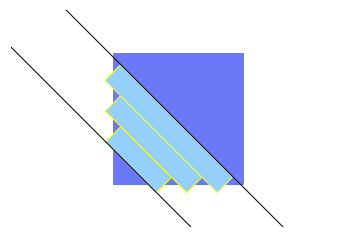

In [5]:
def Riemann_model():
    import matplotlib.patches as patch

    axis = plt.gca()

    pixel = patch.Rectangle([.2,.2], .6, .6, fill=True, color='#6a79f7')
    axis.add_patch(pixel)

    pixel = patch.Rectangle([.4,.16], .1, .33, angle=45, fill=True, facecolor='#95d0fc', edgecolor='yellow')
    axis.add_patch(pixel)

    pixel = patch.Rectangle([.54,.16], .1, .53, angle=45, fill=True, facecolor='#95d0fc', edgecolor='yellow')
    axis.add_patch(pixel)

    pixel = patch.Rectangle([.68,.16], .1, .73, angle=45, fill=True, facecolor='#95d0fc', edgecolor='yellow')
    axis.add_patch(pixel)

    pixel = patch.Rectangle([.96,-.4], .3, 3, angle=45, fill=False, color='black')
    axis.add_patch(pixel)

    plt.axis('equal')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.yticks([])
    plt.xticks([])
    plt.axis('off')
    
plt.figure()
Riemann_model()
plt.show()


## Plot validation results

In [6]:
means = np.load('./data/coverage_validation_means.npy')
std = np.load('./data/coverage_validation_std.npy')

font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 6}
plt.rc('font', **font)

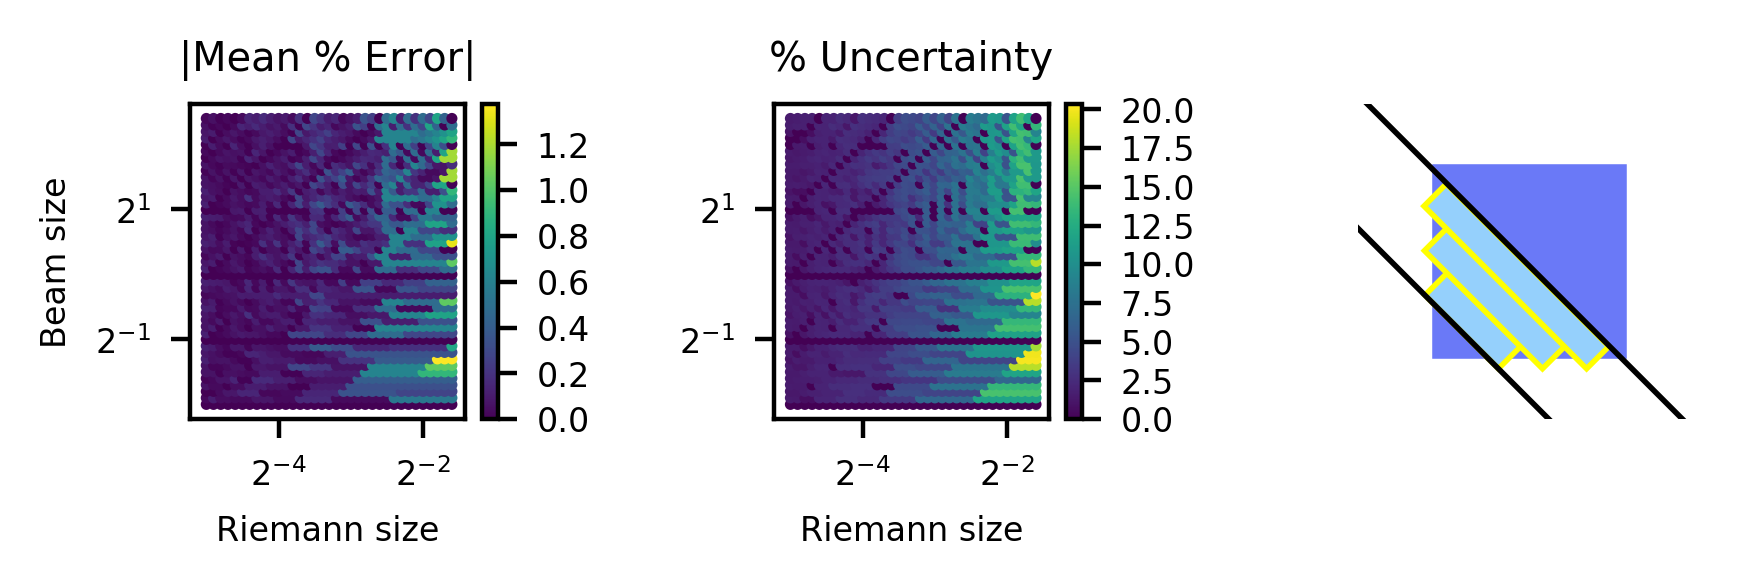

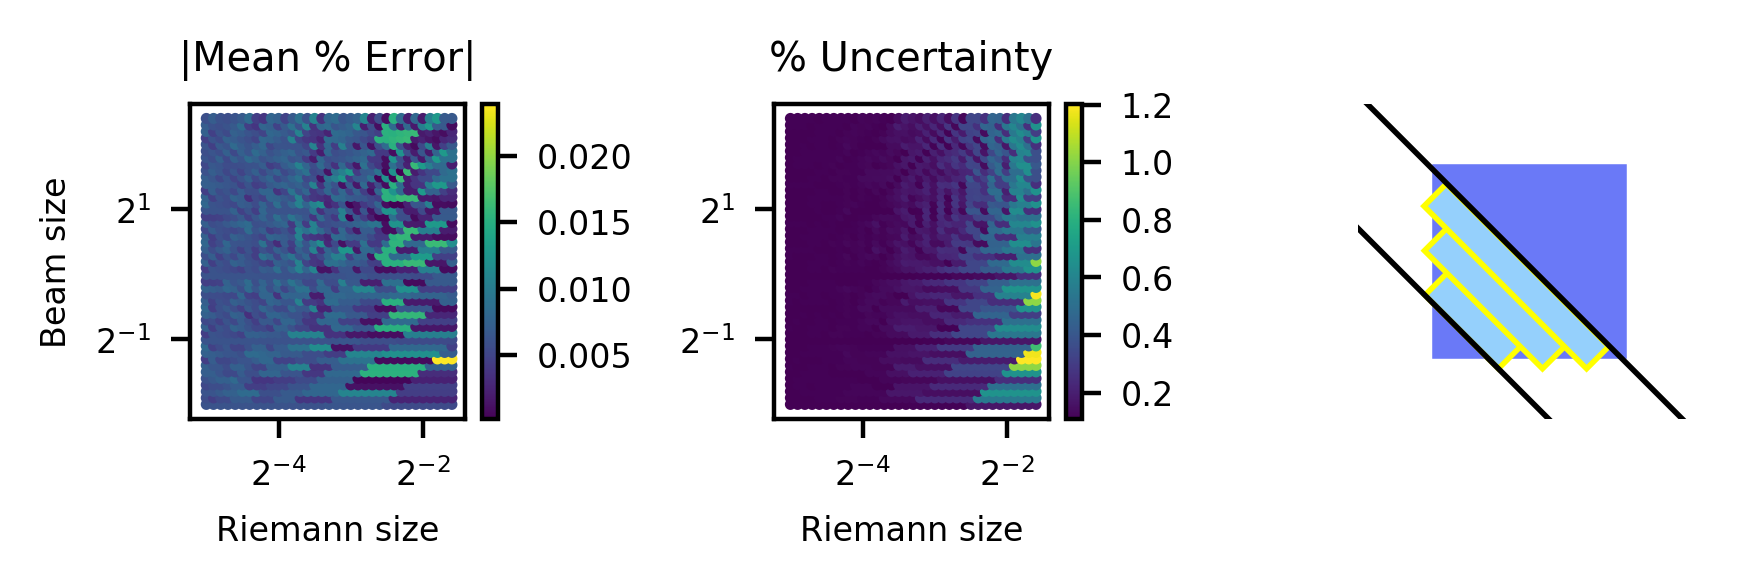

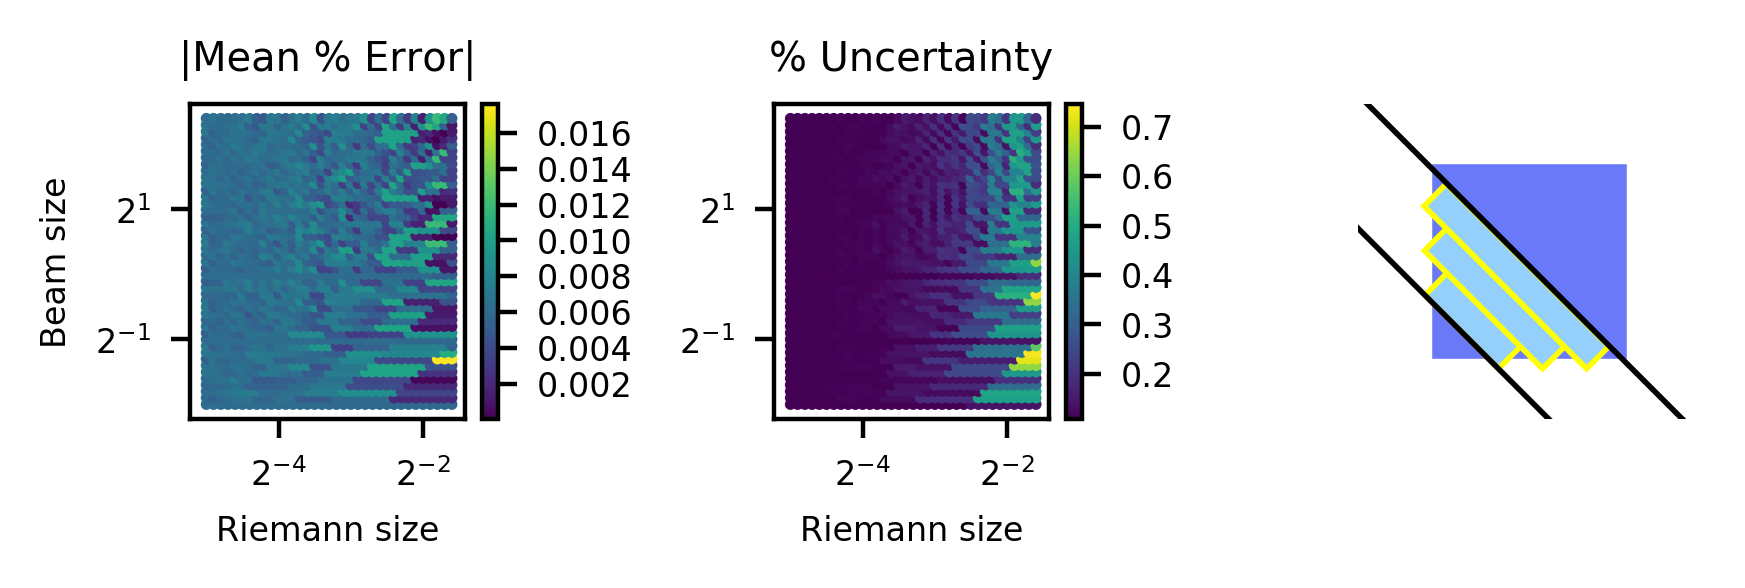

In [38]:
R = R.flatten()
B = B.flatten()

for A in range(len(A_range)):
    f = plt.figure(figsize=(12/2.54, 12/2.54/3), dpi=400)
    
    # downsample the data
    R, B = np.meshgrid(Rp_range, Bp_range)
    mean_error = np.abs(means[A, :, :]) / A_range[A] * 100
    uncertainty = std[A, :, :] / A_range[A] * 100

    q = 1 # sampling factor
    R = sni.zoom(R, q)
    B = sni.zoom(B, q)
    mean_error = sni.zoom(mean_error, q)
    uncertainty = sni.zoom(uncertainty, q)
   
    plt.subplot(131)
    plt.scatter(R, B, c=mean_error, s=np.ones(R.shape)/q**2)
#     plt.contourf(Rp_range, Bp_range, np.abs(means[A, :, :]) / A_range[A] * 100)
    plt.gca().set_xscale('log', basex=2)
    plt.gca().set_yscale('log', basey=2)
    plt.xlabel('Riemann size')
    plt.ylabel('Beam size')
    plt.title('|Mean % Error|')
    plt.colorbar()
    
    plt.subplot(132)
    plt.scatter(R, B, c=uncertainty, s=np.ones(R.shape)/q**2)
#     plt.contourf(Rp_range, Bp_range, std[A, :, :] / A_range[A] * 100)
    plt.gca().set_xscale('log', basex=2)
    plt.gca().set_yscale('log', basey=2)
    plt.xlabel('Riemann size')
#     plt.ylabel('Beam to pixel size')
    plt.title('% Uncertainty')
    plt.colorbar()

    plt.subplot(133)
    plt.subplots_adjust(wspace=0.7, hspace=0, left=0.1, right=0.9, bottom=0.3, top=0.8)
    Riemann_model()
    
    plt.savefig('./figures/validation/{}_coverage_validation.png'.format(A_range[A]), format='png',
            transparent=True, bbox_inches=None, pad_inches=0,
            frameon=False)

plt.show()